In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



df = pd.read_csv('Documents/wineData.txt', names=
                 [ 'Class','Alcohol', 'Malic acid', 'Ash','Alcalinity of ash', 'Magnesium', 'Total phenols', 
                  'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue','Optical density', 'Proline'])
           

df

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,Optical density,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Class                 178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Alcalinity of ash     178 non-null    float64
 5   Magnesium             178 non-null    int64  
 6   Total phenols         178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid phenols  178 non-null    float64
 9   Proanthocyanins       178 non-null    float64
 10  Color intensity       178 non-null    float64
 11  Hue                   178 non-null    float64
 12  Optical density       178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


+ Alcohol: Representa el contenido de alcohol en el vino, generalmente expresado como porcentaje de volumen. 
+ Malic acid: Es un ácido orgánico que se encuentra de forma natural en las uvas. 
+ Ash: Se refiere a la cantidad total de minerales presentes en el vino después de la evaporación del agua y la incineración de la materia orgánica.
+ Alcalinity of ash: Indica la alcalinidad de las cenizas.
+ Magnesium:Un elemento mineral presente en el vino que puede influir en su estructura y sabor.
+ Total phenols: Representa la cantidad total de compuestos fenólicos en el vino, que incluyen antioxidantes.
+ Flavanoids:Son un tipo de fenoles que a menudo contribuyen a la astringencia y al color del vino.
+ Nonflavanoid phenols: Otro grupo de compuestos fenólicos que no son flavonoides, pero que también tienen efectos en la estructura y sabor del vino.
+ Proanthocyanins:Son compuestos que pertenecen a la familia de los flavonoides y contribuyen a la astringencia y coloración del vino.
+ Color intensity:Mide la profundidad del color del vino.
+ Hue: Describe la tonalidad del color del vino.
+ OD280/OD315 of diluted wines:se utiliza para evaluar la concentración de compuestos en el vino.
+ Proline:Es un aminoácido y su presencia en el vino puede estar relacionada con la madurez de las uvas y la calidad del vino.

In [3]:
df.isnull().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
Optical density         0
Proline                 0
dtype: int64

In [4]:
df.isna().sum()

Class                   0
Alcohol                 0
Malic acid              0
Ash                     0
Alcalinity of ash       0
Magnesium               0
Total phenols           0
Flavanoids              0
Nonflavanoid phenols    0
Proanthocyanins         0
Color intensity         0
Hue                     0
Optical density         0
Proline                 0
dtype: int64

In [5]:
df.duplicated().sum()

0

No hay valores nulos ni duplicados

In [6]:
df.nunique()

Class                     3
Alcohol                 126
Malic acid              133
Ash                      79
Alcalinity of ash        63
Magnesium                53
Total phenols            97
Flavanoids              132
Nonflavanoid phenols     39
Proanthocyanins         101
Color intensity         132
Hue                      78
Optical density         122
Proline                 121
dtype: int64

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202,0.775035,1.00,1.0000,2.000,3.0000,3.00
Alcohol,178.0,13.000618,0.811827,11.03,12.3625,13.050,13.6775,14.83
Malic acid,178.0,2.336348,1.117146,0.74,1.6025,1.865,3.0825,5.80
Ash,178.0,2.366517,0.274344,1.36,2.2100,2.360,2.5575,3.23
Alcalinity of ash,178.0,19.494944,3.339564,10.60,17.2000,19.500,21.5000,30.00
Magnesium,178.0,99.741573,14.282484,70.00,88.0000,98.000,107.0000,162.00
Total phenols,178.0,2.295112,0.625851,0.98,1.7425,2.355,2.8000,3.88
Flavanoids,178.0,2.029270,0.998859,0.34,1.2050,2.135,2.8750,5.08
Nonflavanoid phenols,178.0,0.361854,0.124453,0.13,0.2700,0.340,0.4375,0.66
Proanthocyanins,178.0,1.590899,0.572359,0.41,1.2500,1.555,1.9500,3.58


#### correlación

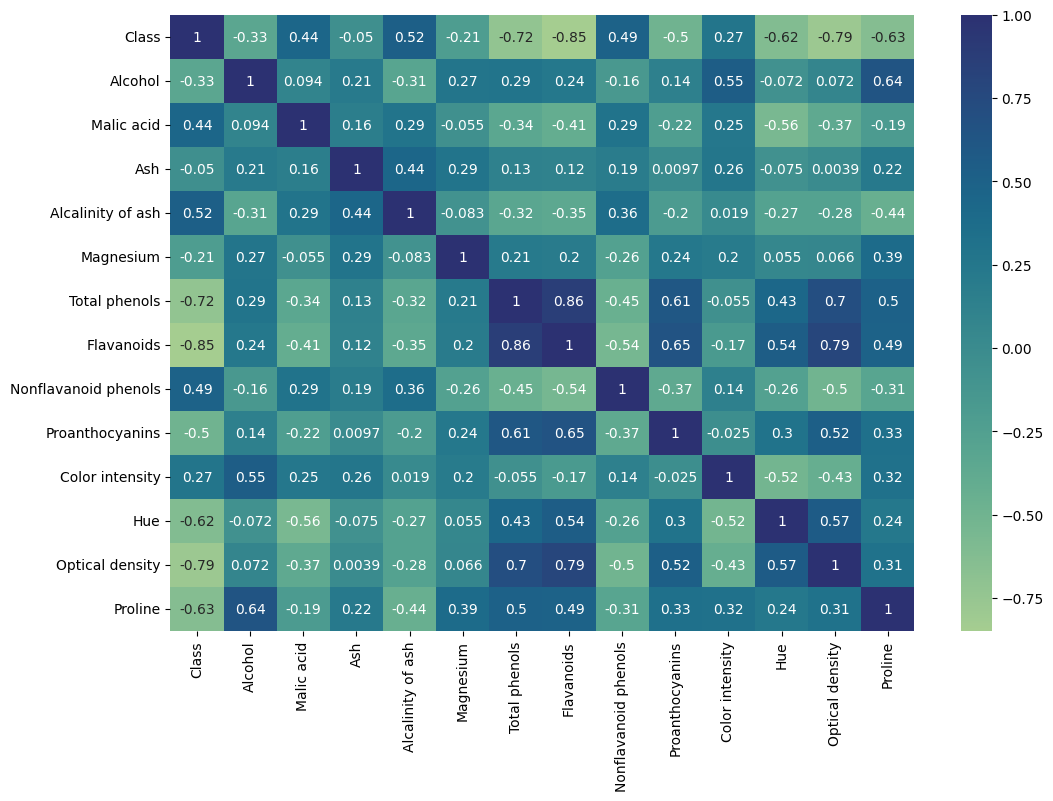

In [8]:
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap="crest",annot=True);


* total phenols - Flavanoids: 0.86
* class - total phenols: -0.72 
* class - flavanoids: -0.85
* class - optical density: -0.79
* optical density - total phenols: 0.7
* optical density - flavanoids: 0.79

#### outliers

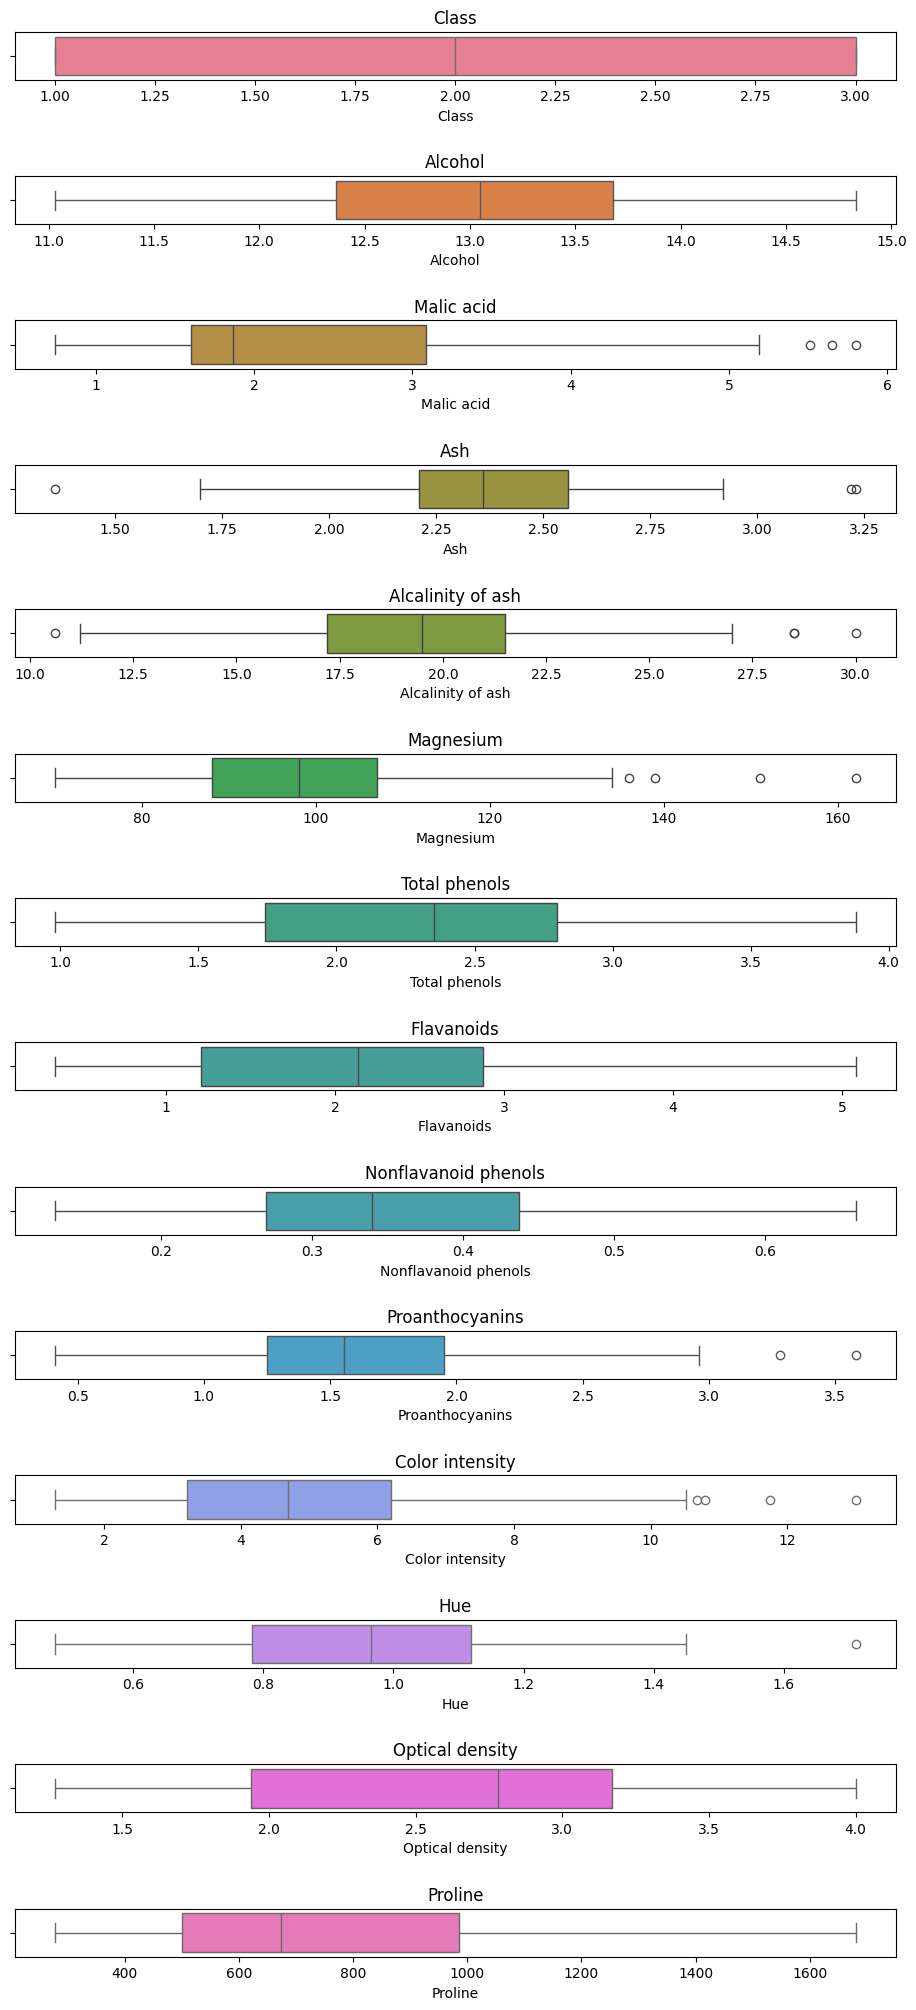

In [9]:
plt.figure(figsize=(25, 25))
palette = sns.color_palette("husl", n_colors=14)
plt.subplots_adjust(hspace=2)

for i, column in enumerate(df.columns):
    plt.subplot(14, 2, 2*i + 1)
    sns.boxplot(x=df[column], orient="h",color=palette[i])
    plt.title(f'{column}')
    

- variables con outaliers: hue, cloro intensity, proanthocyanins, Magnesium, Alcalinity of ash, Ash, Malic acid
- variables sin outliers: Proline, Optical density, Nonflavanoid phenols, Flavanoids, Total phenols, Alcohol
- target: class

#### Prueba de normalidad

In [10]:
H0 = "Los datos de la variable siguen una distribución normal"
H1 = "Los datos de la variable NO siguen una distribución normal"

for i in df.columns:
    stat, p = shapiro(df[i])
    alpha = 0.05
    if p > alpha:
        print(f'Los datos de la variable {i} siguen una distribución normal.')
    else:
        print(f'Los datos de la variable {i} NO siguen una distribución normal.')

Los datos de la variable Class NO siguen una distribución normal.
Los datos de la variable Alcohol NO siguen una distribución normal.
Los datos de la variable Malic acid NO siguen una distribución normal.
Los datos de la variable Ash NO siguen una distribución normal.
Los datos de la variable Alcalinity of ash siguen una distribución normal.
Los datos de la variable Magnesium NO siguen una distribución normal.
Los datos de la variable Total phenols NO siguen una distribución normal.
Los datos de la variable Flavanoids NO siguen una distribución normal.
Los datos de la variable Nonflavanoid phenols NO siguen una distribución normal.
Los datos de la variable Proanthocyanins NO siguen una distribución normal.
Los datos de la variable Color intensity NO siguen una distribución normal.
Los datos de la variable Hue NO siguen una distribución normal.
Los datos de la variable Optical density NO siguen una distribución normal.
Los datos de la variable Proline NO siguen una distribución normal.


La única variable con distribución normal es Alcalinity os ash.

## Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)

- StandardScaler: variables con una distribución normal.
- MinMaxScaler:  variables que no siguen una distribución normal y sin outliers.
- RobustScaler: variables que no siguen una distribución normal y con outliers.

In [11]:
# Estandardització

scaler = StandardScaler()
df['Alcalinity of ash']= scaler.fit_transform(df['Alcalinity of ash'].values.reshape(-1, 1))

minmax_scaler = MinMaxScaler()
variables_sin_outliers = ['Proline', 'Optical density', 'Nonflavanoid phenols', 'Flavanoids', 'Total phenols', 'Alcohol']
df[variables_sin_outliers] = minmax_scaler.fit_transform(df[variables_sin_outliers])


robust_scaler = RobustScaler()
variables_con_outliers = ['Hue','Color intensity','Proanthocyanins', 'Magnesium', 'Ash', 'Malic acid'] 
df[variables_con_outliers] = robust_scaler.fit_transform(df[variables_con_outliers])

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Class,178.0,1.938202e+00,0.775035,1.000000,1.000000,2.000000e+00,3.000000,3.000000
Alcohol,178.0,5.185837e-01,0.213639,0.000000,0.350658,5.315789e-01,0.696711,1.000000
Malic acid,178.0,3.184786e-01,0.754828,-0.760135,-0.177365,-7.502679e-17,0.822635,2.658784
Ash,178.0,1.875354e-02,0.789479,-2.877698,-0.431655,0.000000e+00,0.568345,2.503597
Alcalinity of ash,178.0,-3.991813e-17,1.002821,-2.671018,-0.689137,1.518295e-03,0.602088,3.154511
Magnesium,178.0,9.166174e-02,0.751710,-1.473684,-0.526316,0.000000e+00,0.473684,3.368421
Total phenols,178.0,4.534870e-01,0.215811,0.000000,0.262931,4.741379e-01,0.627586,1.000000
Flavanoids,178.0,3.563860e-01,0.210730,0.000000,0.182489,3.786920e-01,0.534810,1.000000
Nonflavanoid phenols,178.0,4.374603e-01,0.234818,0.000000,0.264151,3.962264e-01,0.580189,1.000000
Proanthocyanins,178.0,5.128411e-02,0.817656,-1.635714,-0.435714,-1.587272e-16,0.564286,2.892857


## Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.

- k-Vecinos Más Cercanos (KNN):
Tipo: No paramétrico
Uso: Clasificación y regresión.
Características: Clasifica una instancia según la mayoría de las k instancias más cercanas en el espacio de características.

* Árboles de Decisión:
Tipo: No lineal
Uso: Clasificación y regresión.
Características: Divide el conjunto de datos en subconjuntos más pequeños basándose en características particulares.

## Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.

#### Matriu de Confusió: 
- Una tabla que muestra el número de instancias clasificadas correctamente e incorrectamente, organizadas por clase real y predicha.
- Elementos:
    - Verdaderos Positivos (TP)
    - Falsos Positivos (FP)
    - Verdaderos Negativos (TN)
    - Falsos Negativos (FN)

#### Accuracy: 
- Mide la proporción de instancias clasificadas correctamente sobre el total de instancias.porcentaje total de valores correctamente clasificados, tanto positivos como negativos.
- Consideraciones: recomendable utilizar esta métrica en problemas en los que los datos están balanceados 
    
   
####  Precisión
La métrica de precisión es utilizada para poder saber qué porcentaje de valores que se han clasificado como positivos son realmente positivos.

#### Recall
La métrica de recall, también conocida como el ratio de verdaderos positivos, es utilizada para saber cuantos valores positivos son correctamente clasificados.

#### F1 Score
Esta es una métrica muy utilizada en problemas en los que el conjunto de datos a analizar está desbalanceado. Esta métrica combina el precision y el recall, para obtener un valor mucho más objetivo.

In [12]:
X = df.drop('Class', axis=1)  
y = df['Class']

# Dividimos los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)


X_train Shape: (142, 13)
y_train Shape: (142,)
X_test Shape: (36, 13)
y_test Shape: (36,)


#### KNN

Accuracy KNN: 0.8611111111111112
Precision KNN: 0.8675925925925926
Recall KNN: 0.8611111111111112
f1 KNN: 0.8599240265906932


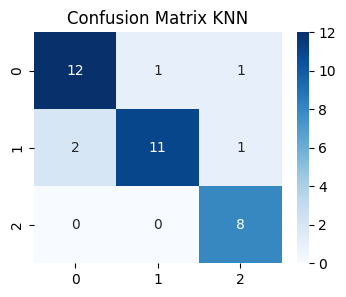

In [13]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
confusion_knn = confusion_matrix(y_test, y_pred_knn)
 
print(f"Accuracy KNN: {accuracy_knn}")
print(f"Precision KNN: {precision_knn}")
print(f"Recall KNN: {recall_knn}")
print(f"f1 KNN: {f1_knn}")

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_knn, annot=True, cmap='Blues')
plt.title("Confusion Matrix KNN")
plt.show()
   

#### Árbol de decisión

Accuracy DTC: 0.9444444444444444
Precision DTC: 0.9462962962962962
Recall DTC: 0.9444444444444444
f1 DTC: 0.9439974457215836


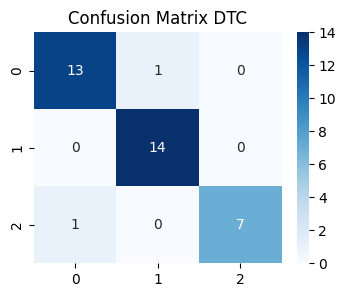

In [14]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)

accuracy_dtc = accuracy_score(y_test, y_pred_dtc)
precision_dtc = precision_score(y_test, y_pred_dtc, average='weighted')
recall_dtc = recall_score(y_test, y_pred_dtc, average='weighted')
f1_dtc = f1_score(y_test, y_pred_dtc, average='weighted')
confusion_dtc = confusion_matrix(y_test, y_pred_dtc)

print(f"Accuracy DTC: {accuracy_dtc}") 
print(f"Precision DTC: {precision_dtc}")
print(f"Recall DTC: {recall_dtc}")
print(f"f1 DTC: {f1_dtc}")

plt.figure(figsize=(4, 3))
sns.heatmap(confusion_dtc, annot=True, cmap='Blues')
plt.title("Confusion Matrix DTC")
plt.show()

Matriz de Confusión - KNN:
* Clase 0: 12 clasificados correctamente.
* Clase 1: 11 de la clase 1 fueron clasificados correctamente, pero hubo 2 falsos negativos y 1 falso positivo.
* Clase 2: 8 de la clase 2 fueron clasificados correctamente.

Matriz de Confusión - DTC:
* Clase 0: 13 fueron clasificados correctamente como clase 0 y 1 falso positivo.
* Clase 1: Todas las 14 instancias de la clase 1 fueron clasificadas correctamente.
* Clase 2: 7 de la clase 2 fueron clasificados correctamente, pero hubo 1 falso positivo.
_________________________
- En el caso de KNN, el rendimiento varía entre las clases. La Clase 0 y la Clase 2 tienen un rendimiento razonable, pero la Clase 1 muestra algunos errores, especialmente en falsos negativos y falsos positivos.
- En el caso de DTC, hay un rendimiento perfecto en la Clase 1, pero se observan errores en las otras clases, especialmente en la Clase 0, donde todas las instancias fueron clasificadas incorrectamente.
- KNN parece tener un rendimiento más equilibrado entre las clases, mientras que DTC es perfecto para la Clase 1 pero tiene problemas en otras clases.

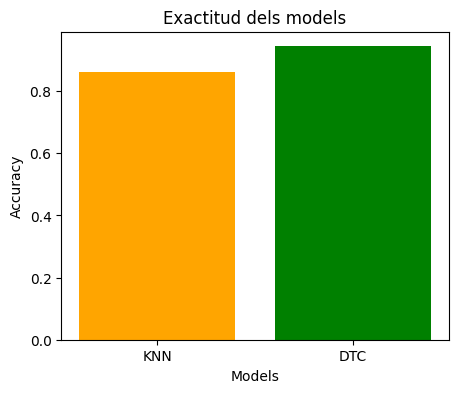

In [15]:
accuracies = [accuracy_knn, accuracy_dtc]
model_names = ['KNN', 'DTC']

plt.figure(figsize=(5, 4))
plt.bar(model_names, accuracies, color=['orange', 'green'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title("Exactitud dels models")

plt.show()

## Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.


### KNN

In [16]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [17]:
# Definimos la rejilla de parámetros a probar
param_grid = {'n_neighbors': [3, 5, 7, 9],         
              'weights': ['uniform', 'distance'],
              'p': [1, 2]}

# Buscamos los mejores parámetros 
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')

#ajustar modelo a los datos
grid_search.fit(X_train, y_train)

# encontrar mejores combinacions de parametros
best_param = grid_search.best_params_

# Obtenemos el mejor modelo después de la búsqueda
best_knn = grid_search.best_estimator_
best_knn.fit(X_train,y_train)

# Hacemos predicciones
y_pred_knn2 = best_knn.predict(X_test)

# Evaluamos el modelo
accuracy_knn2 = accuracy_score(y_test, y_pred_knn2)
precision_knn2 = precision_score(y_test, y_pred_knn2, average='weighted')
recall_knn2 = recall_score(y_test, y_pred_knn2, average='weighted')
f1_knn2 = f1_score(y_test, y_pred_knn2, average='weighted')


print(f'Mejores paràmetres: {best_param}')
print(f"Mejores estimadores: {best_knn}")
print(f'Accuracy KNN2: {accuracy_knn2}')
print(f"Precision KNN2: {precision_knn2}")
print(f"Recall KNN2: {recall_knn2}")
print(f"f1 KNN2: {f1_knn2}")

Mejores paràmetres: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Mejores estimadores: KNeighborsClassifier(n_neighbors=3, p=1, weights='distance')
Accuracy KNN2: 0.9444444444444444
Precision KNN2: 0.9493827160493827
Recall KNN2: 0.9444444444444444
f1 KNN2: 0.9436036129748098


### DTC

In [18]:
dtc.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [23]:
# Definimos la rejilla de parámetros a probar
param_grid_dtc = {'criterion':['gini', 'entropy', 'log_loss'],
            'max_depth':[3,4,5]}


# Buscamos los mejores parámetros 
grid_search_dtc = GridSearchCV(dtc, param_grid_dtc, cv=5, scoring='accuracy')

#ajustar modelo a los datos
grid_search_dtc.fit(X_train, y_train)

# encontrar mejores combinacions de parametros
best_param_dtc = grid_search_dtc.best_params_

# Obtenemos el mejor modelo después de la búsqueda
best_dtc = grid_search_dtc.best_estimator_
best_dtc.fit(X_train,y_train)

# Hacemos predicciones
y_pred_dtc2 = best_dtc.predict(X_test)

# Evaluamos el modelo
accuracy_dtc2 = accuracy_score(y_test, y_pred_dtc2)
precision_dtc2 = precision_score(y_test, y_pred_dtc2, average='weighted')
recall_dtc2 = recall_score(y_test, y_pred_dtc2, average='weighted')
f1_dtc2 = f1_score(y_test, y_pred_dtc2, average='weighted')
print(f'Mejores paràmetres: {best_param_dtc}')
print(f"Mejores estimadores: {best_dtc}")
print(f'Accuracy DTC2: {accuracy_dtc2}')
print(f"Precision DTC2: {precision_dtc2}")
print(f"Recall DTC2: {recall_dtc2}")
print(f"f1 DTC2: {f1_dtc2}")

Mejores paràmetres: {'criterion': 'gini', 'max_depth': 3}
Mejores estimadores: DecisionTreeClassifier(max_depth=3)
Accuracy DTC2: 0.9444444444444444
Precision DTC2: 0.9513888888888888
Recall DTC2: 0.9444444444444444
f1 DTC2: 0.9448559670781894


Observamos que el modelo KNN a mejorado el rendimiento sin embargo en DTC no hay mejoras.

## Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.

In [22]:
cross_model_knn = KNeighborsClassifier(n_neighbors= 3, p= 1, weights= 'distance')

#validación cruzada
scores_knn_accuracy = cross_val_score(cross_model_knn, X, y, cv=5, scoring='accuracy').mean()

#Resultados
print(f'Accuracy knn:{scores_knn_accuracy}' )

Accuracy knn:0.954920634920635


In [21]:
cross_model_dtc =DecisionTreeClassifier(max_depth=)

#validación cruzada
scores_dtc_accuracy = cross_val_score(cross_model_dtc, X, y, cv=5, scoring='accuracy').mean()

#Resultados
print(f'Accuracy dtc:{scores_dtc_accuracy}' )

Accuracy dtc:0.870952380952381
